데이터 길이: 365 
앞쪽 5개 값: [[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]]


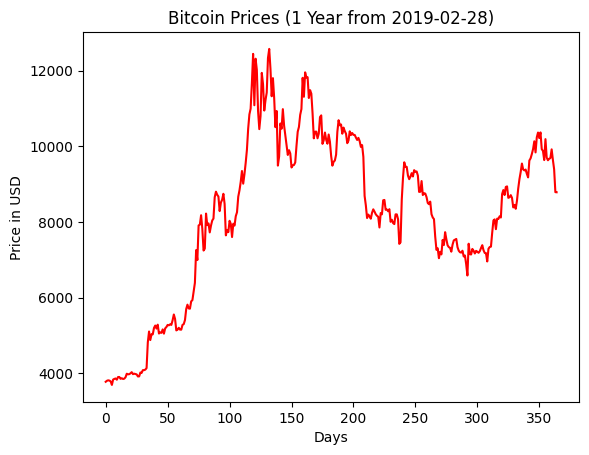

In [2]:
# 1(a). 비트코인 가격 데이터 읽기 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

f=open('../temp/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy()
print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[:5])

plt.plot(seq,color='red')
plt.title('Bitcoin Prices (1 Year from 2019-02-28)')
plt.xlabel('Days')
plt.ylabel('Price in USD')
plt.show()

In [5]:
# 1(b). 1년치 비트코인 가격 데이터를 윈도우로 자르기([그림 8-2])
def seq2dataset(seq,window,horizon):
    X=np.array([seq[i:(i+window)]for i in range(len(seq)-window-horizon+1)])
    Y=np.array([s for s in seq[window+horizon-1:]])
    return X,Y

X,Y = seq2dataset(seq,7,1)
print(X.shape,Y.shape)
print(X[0],Y[0])
print(X[-1],Y[-1])

(358, 7, 1) (358, 1)
[[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]
 [3832.08088473]] [3848.95636968]
[[9631.48494596]
 [9670.85865437]
 [9689.08674285]
 [9919.55144784]
 [9640.46950506]
 [9392.86962872]
 [8787.97836316]] [8784.99535244]


Epoch 1/200
250/250 - 4s - loss: 1517.4626 - mae: 1517.4626 - val_loss: 340.0869 - val_mae: 340.0869 - 4s/epoch - 17ms/step
Epoch 2/200
250/250 - 3s - loss: 558.0176 - mae: 558.0176 - val_loss: 418.4169 - val_mae: 418.4169 - 3s/epoch - 12ms/step
Epoch 3/200
250/250 - 3s - loss: 505.4326 - mae: 505.4326 - val_loss: 455.3246 - val_mae: 455.3246 - 3s/epoch - 12ms/step
Epoch 4/200
250/250 - 3s - loss: 526.4418 - mae: 526.4418 - val_loss: 556.2164 - val_mae: 556.2164 - 3s/epoch - 11ms/step
Epoch 5/200
250/250 - 3s - loss: 501.9219 - mae: 501.9219 - val_loss: 337.0795 - val_mae: 337.0795 - 3s/epoch - 12ms/step
Epoch 6/200
250/250 - 3s - loss: 450.0102 - mae: 450.0102 - val_loss: 896.5977 - val_mae: 896.5977 - 3s/epoch - 12ms/step
Epoch 7/200
250/250 - 3s - loss: 510.1403 - mae: 510.1403 - val_loss: 283.1869 - val_mae: 283.1869 - 3s/epoch - 11ms/step
Epoch 8/200
250/250 - 3s - loss: 485.1944 - mae: 485.1944 - val_loss: 290.9191 - val_mae: 290.9191 - 3s/epoch - 11ms/step
Epoch 9/200
250/250 - 

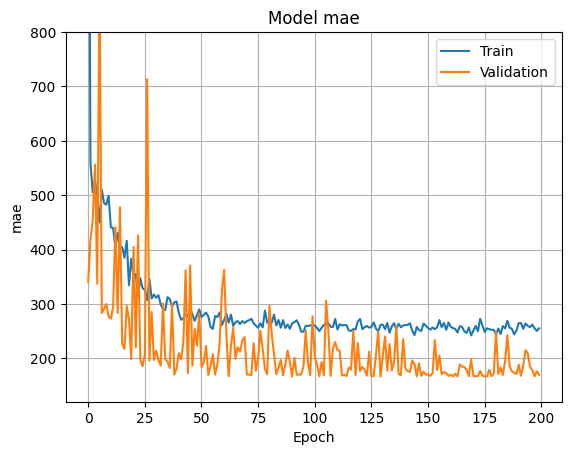

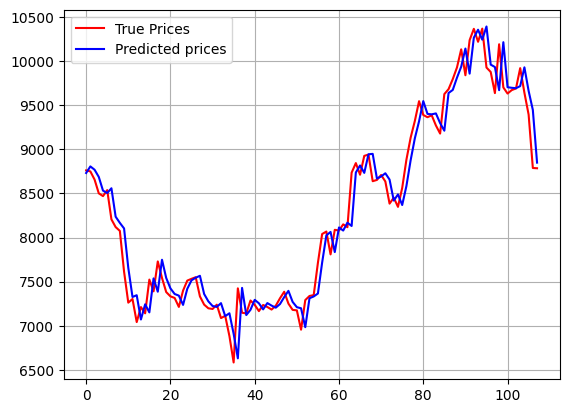

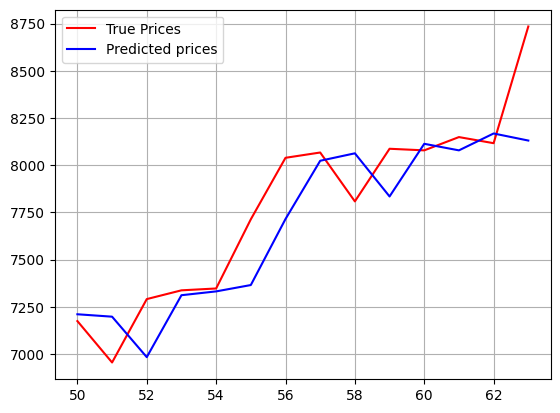

In [1]:
#2. LSTM을 이용한 비트코인 가격 예측
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

coindesk_data=pd.read_csv(open('../temp/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r'),header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy()

def seq2dataset(seq,window,horizon):
    x = np.array([seq[i:(i+window)] for i in range(len(seq)-window-horizon+1)])
    y = np.array([s for s in seq[window+horizon-1:]])
    return x,y

X,Y = seq2dataset(seq,7,1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

split=int(len(X)*0.7)
x_train,x_test = X[:split],X[split:]
y_train,y_test = Y[:split],Y[split:]

model = Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수: ",ev[0],'MAE:',ev[1])

pred=model.predict(x_test)
print('평균절댓값백분율오차(MAPE):',sum(abs(y_test-pred)/y_test)/len(x_test))

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range],color='red')
plt.plot(x_range,pred[x_range],color='blue')
plt.legend(['True Prices','Predicted prices'],loc='best')
plt.grid()
plt.show()

x_range=range(50,64)
plt.plot(x_range,y_test[x_range],color='red')
plt.plot(x_range,pred[x_range],color='blue')
plt.legend(['True Prices','Predicted prices'],loc='best')
plt.grid()
plt.show()

(358, 7, 4) (358, 4)
[[3772.93633533 3796.63728431 3824.16587937 3666.52401643]
 [3799.67854295 3773.44146075 3879.23118467 3753.80002246]
 [3811.61197937 3799.36702601 3840.04482307 3788.91849833]
 [3804.41917011 3806.69151279 3819.19435612 3759.40921647]
 [3782.66410112 3807.84575592 3818.69548135 3766.24204823]
 [3689.86289319 3783.35506344 3804.35361623 3663.47774336]
 [3832.08088473 3701.04987103 3866.71870424 3688.69715385]] [3848.95636968 3832.59242908 3881.96576977 3802.51605364]
Epoch 1/200
250/250 - 4s - loss: 2395.2173 - mae: 2395.2173 - val_loss: 495.4903 - val_mae: 495.4903 - 4s/epoch - 18ms/step
Epoch 2/200
250/250 - 3s - loss: 543.0765 - mae: 543.0765 - val_loss: 308.9064 - val_mae: 308.9064 - 3s/epoch - 12ms/step
Epoch 3/200
250/250 - 3s - loss: 538.2965 - mae: 538.2965 - val_loss: 386.6287 - val_mae: 386.6287 - 3s/epoch - 12ms/step
Epoch 4/200
250/250 - 3s - loss: 477.4020 - mae: 477.4020 - val_loss: 458.5844 - val_mae: 458.5844 - 3s/epoch - 12ms/step
Epoch 5/200
250/2

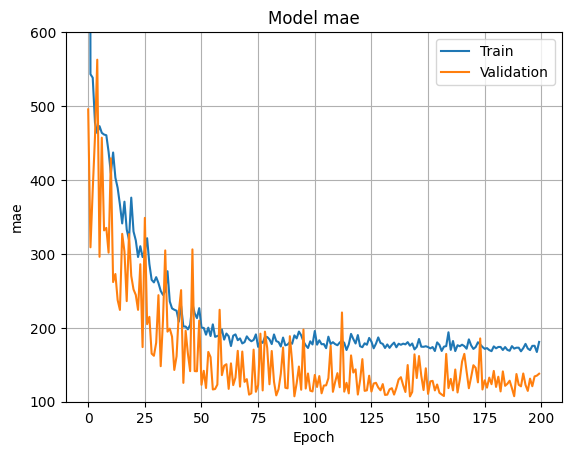

In [1]:
# 3. 다중 채널 비트코인 가격 예측 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

f=open('../temp/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r')
coindesk_data = pd.read_csv(f,header=0)
seq = coindesk_data[['Closing Price (USD)', '24h Open (USD)', '24h High (USD)', '24h Low (USD)']].to_numpy()

def seq2dataset(seq,window,horizon):
    X = np.array([seq[i:(i+window)] for i in range(len(seq)-(window+horizon)+1)])
    Y = np.array([s for s in seq[window+horizon-1:]])
    return X,Y

w,h=7,1

X,Y=seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

split=int(len(X)*0.7)
data_split = lambda x,split_idx: (x[0:split_idx],x[split_idx:])
x_train,x_test = data_split(X,split)
y_train,y_test = data_split(Y,split)

model = Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

ev=model.evaluate(x_test,y_test,verbose=0)
print('손실 함수: ',ev[0],'MAE: ',ev[1])

pred=model.predict(x_test)
print('LSTM 평균절댓값백분율오차(MAPE):',sum(abs(y_test-pred)/y_test)/len(x_test))

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([100,600])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()


In [2]:
# 4(a). music21 라이브러리로 ABC 표기 연주하기 
import music21
little_star='tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2'
music21.converter.parse(little_star).show('mid')

In [66]:
# 4(b). 신경망으로 악보 학습 후 새로운 곡 생성하기 
import numpy as np 
import math
note=['c','d','e','f','g','a','b']
note2num = lambda n: note.index(n)+1 
num2note = lambda n: note[n-1]

def abc2timeseries(s):
    notes=s.split(' ')[2:]
    return [[note2num(note[0]),int(note[1])] for note in notes]

def timeseries2abc(time):
    return 'tinynotation: 4/4 ' + ' '.join([num2note(t[0])+str(t[1]) for t in time])
    
    
onehot_len = 21
onehot=lambda n:[n%7+1,2**(n//7+1)] if n < onehot_len else 'out of range'
onehot_index = lambda l:l[0] + (int(math.log2(l[1])))*7 - 8

import tensorflow as tf 
def to_onehot(l):
    return tf.keras.utils.to_categorical(np.array([onehot_index(o) for o in l]),onehot_len)

def seq2dataset(seq,window,horizon):
    x = np.array([seq[i:(i+window)] for i in range(len(seq)-window-horizon+1)])
    y = np.array([s for s in seq[window+horizon-1:]])
    return x,y

w,h=8,1

seq=abc2timeseries(little_star)
X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

split = int(len(X)*1.0)
x_train = X[0:split]
y_train = Y[0:split]
y_train = to_onehot(y_train)

model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(y_train.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200,batch_size=1,verbose=2)

def arranging_music(model,first_measure,duration):
    music=first_measure
    for i in range(duration):
        p=model.predict(np.float32(np.expand_dims(music[-w:],axis=0)))
        music=np.append(music,[onehot(np.argmax(p))],axis=0)
    return timeseries2abc(music)

new_song = arranging_music(model,x_train[0],50)

print(new_song)

music21.converter.parse(new_song).show('mid')

(34, 8, 2) (34, 2)
[[1 4]
 [1 4]
 [5 4]
 [5 4]
 [6 4]
 [6 4]
 [5 2]
 [4 4]] [4 4]
Epoch 1/200
34/34 - 2s - loss: 2.9028 - accuracy: 0.0588 - 2s/epoch - 57ms/step
Epoch 2/200
34/34 - 0s - loss: 2.2826 - accuracy: 0.2353 - 406ms/epoch - 12ms/step
Epoch 3/200
34/34 - 0s - loss: 2.1477 - accuracy: 0.2059 - 417ms/epoch - 12ms/step
Epoch 4/200
34/34 - 0s - loss: 2.0454 - accuracy: 0.2941 - 408ms/epoch - 12ms/step
Epoch 5/200
34/34 - 0s - loss: 1.9999 - accuracy: 0.2647 - 407ms/epoch - 12ms/step
Epoch 6/200
34/34 - 0s - loss: 1.9509 - accuracy: 0.2941 - 403ms/epoch - 12ms/step
Epoch 7/200
34/34 - 0s - loss: 1.8923 - accuracy: 0.3529 - 405ms/epoch - 12ms/step
Epoch 8/200
34/34 - 0s - loss: 1.8027 - accuracy: 0.3529 - 411ms/epoch - 12ms/step
Epoch 9/200
34/34 - 0s - loss: 1.6226 - accuracy: 0.4412 - 414ms/epoch - 12ms/step
Epoch 10/200
34/34 - 0s - loss: 1.8546 - accuracy: 0.2647 - 394ms/epoch - 12ms/step
Epoch 11/200
34/34 - 0s - loss: 1.4737 - accuracy: 0.3824 - 407ms/epoch - 12ms/step
Epoch 

In [2]:
# 4(b). 신경망으로 악보 학습 후 새로운 곡 생성하기 
import numpy as np 
import math
import music21

little_star="tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2"
spring_picnic="tinynotation: 4/8 g8 e8 g8 e8 g8 a8 g4 e8 g8 e8 c8 d8 e8 c4 g8 e8 g8 e8 g8 a8 g4 b8 a8 g8 e8 d8 e8 c4"
butterfly="tinynotation: 2/4 g8 e8 e4 f8 d8 d4 c8 d8 e8 f8 g8 g8 g4 g8 e8 e8 e8 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4 d8 d8 d8 d8 d8 e8 f4 e8 e8 e8 e8 e8 f8 g4 g8 e8 e4 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4"
song = [little_star,spring_picnic,butterfly]
note=['c','d','e','f','g','a','b']
note2num = lambda n: note.index(n)+1 
num2note = lambda n: note[n-1]

def abc2timeseries(s):
    notes=s.split(' ')[2:]
    return [[note2num(note[0]),int(note[1])] for note in notes]

def timeseries2abc(time):
    return 'tinynotation: 4/4 ' + ' '.join([num2note(t[0])+str(t[1]) for t in time])
    
    
onehot_len = 21
onehot=lambda n:[n%7+1,2**(n//7+1)] if n < onehot_len else 'out of range'
onehot_index = lambda l:l[0] + (int(math.log2(l[1])))*7 - 8

import tensorflow as tf 
def to_onehot(l):
    return tf.keras.utils.to_categorical(np.array([onehot_index(o) for o in l]),onehot_len)

def seq2dataset(seq,window,horizon):
    x = np.array([seq[i:(i+window)] for i in range(len(seq)-window-horizon+1)])
    y = np.array([s for s in seq[window+horizon-1:]])
    return x,y

w,h=8,1

seq = sum([abc2timeseries(s) for s in song],[])
X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

split = int(len(X)*1.0)
x_train = X[0:split]
y_train = Y[0:split]
y_train = to_onehot(y_train)

model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(y_train.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200,batch_size=1,verbose=2)

def arranging_music(model,first_measure,duration):
    music=first_measure
    for i in range(duration):
        p=model.predict(np.float32(np.expand_dims(music[-w:],axis=0)))
        music=np.append(music,[onehot(np.argmax(p))],axis=0)
    return timeseries2abc(music)

new_song = arranging_music(model,x_train[0],50)

print(new_song)

music21.converter.parse(new_song).show('mid')

(116, 8, 2) (116, 2)
[[1 4]
 [1 4]
 [5 4]
 [5 4]
 [6 4]
 [6 4]
 [5 2]
 [4 4]] [4 4]
Epoch 1/200
116/116 - 3s - loss: 2.7076 - accuracy: 0.2069 - 3s/epoch - 23ms/step
Epoch 2/200
116/116 - 1s - loss: 2.3424 - accuracy: 0.2845 - 1s/epoch - 11ms/step
Epoch 3/200
116/116 - 1s - loss: 2.2505 - accuracy: 0.2931 - 1s/epoch - 11ms/step
Epoch 4/200
116/116 - 1s - loss: 2.1789 - accuracy: 0.2500 - 1s/epoch - 11ms/step
Epoch 5/200
116/116 - 1s - loss: 2.1182 - accuracy: 0.2931 - 1s/epoch - 11ms/step
Epoch 6/200
116/116 - 1s - loss: 2.0910 - accuracy: 0.3017 - 1s/epoch - 11ms/step
Epoch 7/200
116/116 - 1s - loss: 2.0365 - accuracy: 0.3362 - 1s/epoch - 11ms/step
Epoch 8/200
